# _automaton_.is_functional

Whether the automaton is _functional_, i.e. each input (string) is transduced to a unique output (string). There may be multiple paths, however, that contain this input and output string pair.

Precondition:
- The automaton is transducer

## Examples

In [1]:
import vcsn

### Simple Cases

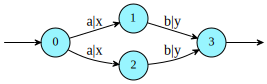

In [2]:
%%automaton -s a
context = [...] x [...] -> b
$ -> 0
0 -> 1 a|x
0 -> 2 a|x
1 -> 3 b|y
2 -> 3 b|y
3 -> $

This transducer is functional, as can also be seen from its series (computed thanks to _automaton_.shortest): it uniquely maps `ab` to `xy`.

In [3]:
a.is_functional()

True

In [4]:
a.shortest(10)

ab|xy

However, the following transducer is _not_ functional, as it maps `ab` to both `xy` and `xz`, again, as demonstrated by `shortest`.

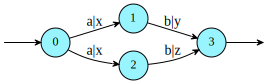

In [5]:
%%automaton -s a
context = [...] x [...] -> B
$ -> 0
0 -> 1 a|x
0 -> 2 a|x
1 -> 3 b|y
2 -> 3 b|z
3 -> $

In [6]:
a.is_functional()

False

In [7]:
a.shortest(10)

ab|xy + ab|xz

### A More Complex Example

The following example (Figure 3 from [beal.2003.tcs](References.ipynb#beal.2003.tcs)) shows a transducer whose _input automaton_ is ambiguous, yet the transduder is functional.

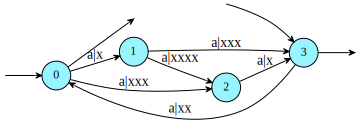

In [8]:
%%automaton -s a
context = [...] x [...]* -> B
$ -> 0
0 -> $
0 -> 1 a|x
0 -> 2 a|xxx
1 -> 2 a|xxxx
1 -> 3 a|xxx
2 -> 3 a|x
3 -> 0 a|xx
$ -> 3
3 -> $

This transducer is functional:

In [9]:
a.is_functional()

True

If we focus on the "input automaton", in other words, on the tape 0 of this transducer, we can see that it is ambigous.

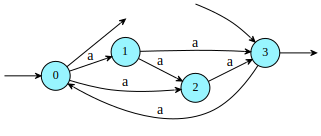

In [10]:
b = a.focus(0)
b

In [11]:
b.is_ambiguous()

True